In [13]:
from typing import Callable, Iterable
import hash_string, words
import matplotlib.pyplot as plt
import numpy as np


In [14]:

hash_funcs: list[Callable[[str], int]] = [
    hash_string.string_sum01,
    hash_string.string_sum02,
    hash_string.string_sum03,
    hash_string.string_sum04,
]


def test_hash_func(
    hash_func: Callable[[str], int],
    words_iter: Iterable[str],
    no_bucket: int
) -> list[int]:
    
    buckets: list[int] = [
        0 for _ in range(no_bucket)
    ]
    
    hits: list[int] = []
    
    for word in words_iter:
        word_hash: int = hash_func(word)
        word_hash = word_hash % no_bucket

        buckets[word_hash] += 1
        hits.append(word_hash)
    
    return buckets, hits
    


In [15]:

all_bucket_collisions: list[list[int]] = []
all_func_hits: list[list[int]] = []

for hash_func in hash_funcs:
    bucket_collisions: list[int] 
    func_hits: list[int] 
    
    
    bucket_collisions, func_hits = test_hash_func(
        hash_func,
        words.yield_word(),
        256
    )
    
    all_bucket_collisions.append(bucket_collisions)
    all_func_hits.append(func_hits)
    


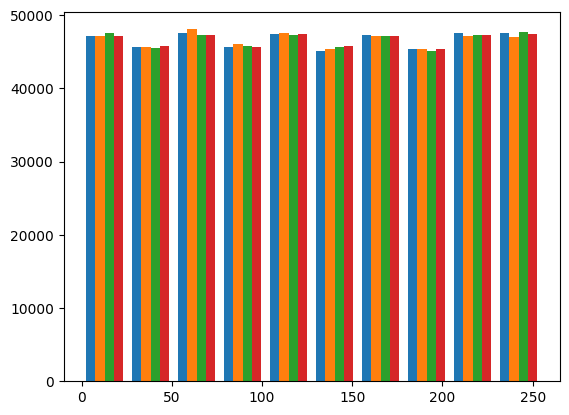

In [16]:
plt.hist(all_func_hits)
plt.show()